In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
#from google.colab import files

In [2]:
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
df = pd.read_csv("../../data/train/train.csv")

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head(5)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,version_Remix,version_type_encoded,decade,decade_range,energy_danceability_valence,acoustic_intensity,popularity_energy_ratio,valence_energy_dif,decade_label,popularity_normalized
0,1xUJ1mdLAysxNBtO9w3J2g,Stompin At The Savoy,['Benny Goodman'],195533,1/1/90,1990,0.836,0.5250,0.222,0.079900,...,0,1,1990,90s-00s,0.075175,-9.250340,225.215080,0.4230,2,0.370632
1,62fX8EW16l8St2yL8rMer9,In My Room - Remastered,['The Beach Boys'],134133,9/16/63,1963,0.184,0.3410,0.416,0.000063,...,0,2,1960,50s-60s,0.070786,-1.761616,129.804572,0.0830,0,2.548527
2,0vTrXo9zLWib36Us8BQ4sN,State Of Independence - Single Version,['Jon & Vangelis'],262107,1/1/84,1984,0.148,0.7520,0.652,0.045500,...,0,1,1980,70s-80s,0.428526,-1.941760,59.815034,0.2220,1,0.272035
3,23IoCDFHoz1uM5XELOSg1U,Chandni Raaten Pyar Ki Baaten,"['Hemant Kumar', 'Lata Mangeshkar']",208973,12/1/52,1952,0.990,0.3110,0.253,0.000156,...,0,1,1950,50s-60s,0.033204,-11.814660,43.476542,0.1690,0,-0.478555
4,5ZrtPphrWFzzamKn3jSnv9,"Adagio for Strings, Op. 11","['Samuel Barber', 'Philadelphia Orchestra', 'E...",463347,1955,1955,0.910,0.0626,0.129,0.780000,...,0,1,1950,50s-60s,0.000281,-19.532240,302.302147,-0.0942,0,1.492568


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95958 entries, 0 to 95957
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           95958 non-null  object 
 1   name                         95958 non-null  object 
 2   artists                      95958 non-null  object 
 3   duration_ms                  95958 non-null  int64  
 4   release_date                 95958 non-null  object 
 5   year                         95958 non-null  int64  
 6   acousticness                 95958 non-null  float64
 7   danceability                 95958 non-null  float64
 8   energy                       95958 non-null  float64
 9   instrumentalness             95958 non-null  float64
 10  liveness                     95958 non-null  float64
 11  loudness                     95958 non-null  float64
 12  speechiness                  95958 non-null  float64
 13  tempo           

In [5]:
df.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit', 'artists_frequency', 'version_type',
       'base_name', 'version_Live', 'version_Original', 'version_Remaster',
       'version_Remix', 'version_type_encoded', 'decade', 'decade_range',
       'energy_danceability_valence', 'acoustic_intensity',
       'popularity_energy_ratio', 'valence_energy_dif', 'decade_label',
       'popularity_normalized'],
      dtype='object')

### Todas las variables

In [6]:
X = df[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'version_type_encoded', 'energy_danceability_valence', 'acoustic_intensity',
       'popularity_energy_ratio', 'valence_energy_dif',
       'popularity_normalized']]
y = df['decade_label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(95958, 18)
(19191, 18)
(76767, 18)
(19191,)
(76767,)


In [8]:
model_1 = XGBClassifier(random_state=42)
model_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [9]:
y_pred_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
precision_1 = precision_score(y_test, y_pred_1, average='macro')
recall_1 = recall_score(y_test, y_pred_1, average='macro')
f1_1 = f1_score(y_test, y_pred_1, average='macro')

print("Accuracy:", accuracy_1)
print("Precisión (Precision):", precision_1)
print("Sensibilidad (Recall):", recall_1)
print("F1-Score:", f1_1)

Accuracy: 0.9941902119400263
Precisión (Precision): 0.9941884352569524
Sensibilidad (Recall): 0.9941887014408067
F1-Score: 0.9941884628619165


In [10]:
feature_importances = model_1.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
1,acousticness,0.319157
6,loudness,0.157274
14,acoustic_intensity,0.103969
15,popularity_energy_ratio,0.097719
0,duration_ms,0.068356
17,popularity_normalized,0.055885
3,energy,0.055470
16,valence_energy_dif,0.029043
12,version_type_encoded,0.024037
4,instrumentalness,0.018459


### Variables originales

In [11]:
X_2 = df[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity_normalized']]
y_2 = df['decade_label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, train_size=0.2, random_state=42)
model_2 = XGBClassifier(random_state=42)
model_2.fit(X_train, y_train)

print(X_2.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(95958, 13)
(19191, 13)
(76767, 13)
(19191,)
(76767,)


In [16]:
feature_importances = model_2.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_2.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
1,acousticness,0.240916
6,loudness,0.148992
12,popularity_normalized,0.139593
0,duration_ms,0.101221
4,instrumentalness,0.064392
2,danceability,0.061761
9,valence,0.055922
3,energy,0.050184
7,speechiness,0.049054
8,tempo,0.030524


In [13]:
y_pred_2 = model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)
precision_2 = precision_score(y_test, y_pred_2, average='macro')
recall_2 = recall_score(y_test, y_pred_2, average='macro')
f1_2 = f1_score(y_test, y_pred_2, average='macro')

print("Accuracy:", accuracy_2)
print("Precisión (Precision):", precision_2)
print("Sensibilidad (Recall):", recall_2)
print("F1-Score:", f1_2)

Accuracy: 0.9921320359008428
Precisión (Precision): 0.9921308177181601
Sensibilidad (Recall): 0.9921320693720185
F1-Score: 0.9921313479569965


In [14]:
y_train_pred = model_2.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model_2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy en entrenamiento:", train_accuracy)
print("Accuracy en prueba:", test_accuracy)

Accuracy en entrenamiento: 0.9991662758584753
Accuracy en prueba: 0.9921320359008428


In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_2, X_2, y_2, cv=5, scoring='accuracy')

print("Scores de validación cruzada:", scores)
print("Media de scores:", scores.mean())

Scores de validación cruzada: [0.99640475 0.99593581 0.99489371 0.99630035 0.99671721]
Media de scores: 0.9960503649183025


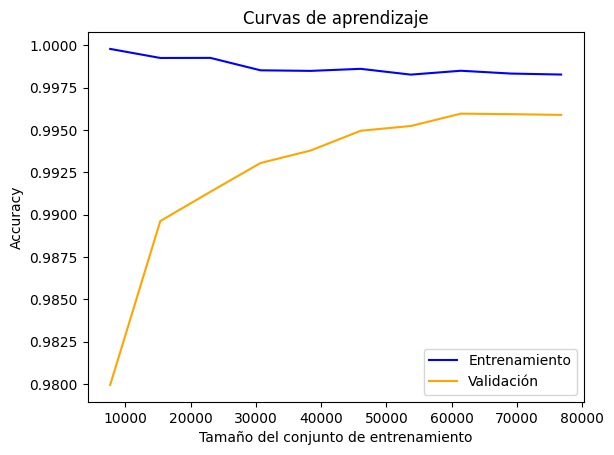

In [16]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model_2, X_2, y_2, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Entrenamiento", color="blue")
plt.plot(train_sizes, test_mean, label="Validación", color="orange")
plt.title("Curvas de aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [17]:
y_test_pred = model_2.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25610
           1       0.99      0.99      0.99     25560
           2       1.00      1.00      1.00     25597

    accuracy                           0.99     76767
   macro avg       0.99      0.99      0.99     76767
weighted avg       0.99      0.99      0.99     76767



Prueba sobre datos no vistos totalmente nuevos

In [19]:
uploaded = files.upload()

Saving test.csv to test.csv


In [20]:
df_nuevo = pd.read_csv("test.csv")

In [21]:
df_nuevo.head(5)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,version_Remix,version_type_encoded,decade,decade_range,energy_danceability_valence,acoustic_intensity,popularity_energy_ratio,valence_energy_dif,decade_label,popularity_normalized
0,3x9WAJIEhsY8Eg5lwu1Z4A,Multiply (feat. Nate Dogg),"['Xzibit', 'Nate Dogg']",248107,10/1/02,2002,0.0285,0.915,0.719,0.000000,...,0,1,2000,90s-00s,0.525650,-0.182714,58.413652,0.0800,2,-0.480925
1,3H67q7a5uZr07zYTM18i6m,Un Millón De Lágrimas,['Tropical Panamá'],173787,1/1/92,1992,0.2260,0.667,0.579,0.020200,...,0,1,1990,90s-00s,0.361863,-1.688446,70.810521,0.3580,2,-0.587369
2,07wbIsFWkJSfkbVFSsp7Ne,Rhayader Goes To Town,['Camel'],320387,4/15/75,1975,0.2530,0.373,0.423,0.527000,...,0,1,1970,70s-80s,0.067056,-3.181981,85.104371,0.0020,1,-0.002346
3,53RYTfkLiyZuUZHwJC3Wmm,We Suck Young Blood,['Radiohead'],296707,2003,2003,0.8780,0.135,0.239,0.029200,...,0,1,2000,90s-00s,0.001220,-9.723850,192.460567,-0.2012,2,-0.055146
4,0htijg4vyYMkezwrLaUkkE,Cariño Santo - Version 1980,['Los Baron De Apodaca'],214880,1/1/80,1980,0.5960,0.678,0.465,0.000012,...,0,1,1980,70s-80s,0.240866,-3.349520,49.461302,0.2990,1,-1.191329


In [22]:
X_nuevo = df_nuevo[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity_normalized']]
y_nuevo = df_nuevo['decade_label']

In [23]:
y_nuevos_pred = model_2.predict(X_nuevo)

In [24]:
accuracy = accuracy_score(y_nuevo, y_nuevos_pred)
precision = precision_score(y_nuevo, y_nuevos_pred, average='macro')
recall = recall_score(y_nuevo, y_nuevos_pred, average='macro')
f1 = f1_score(y_nuevo, y_nuevos_pred, average='macro')

print("Rendimiento en datos no vistos:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Rendimiento en datos no vistos:
Accuracy: 0.9918716131721551
Precision: 0.991869648422071
Recall: 0.9918704630788486
F1-Score: 0.9918699083032


In [25]:
print("\nReporte de clasificación:")
print(classification_report(y_nuevo, y_nuevos_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7990
           1       0.99      0.99      0.99      8000
           2       0.99      0.99      0.99      8000

    accuracy                           0.99     23990
   macro avg       0.99      0.99      0.99     23990
weighted avg       0.99      0.99      0.99     23990



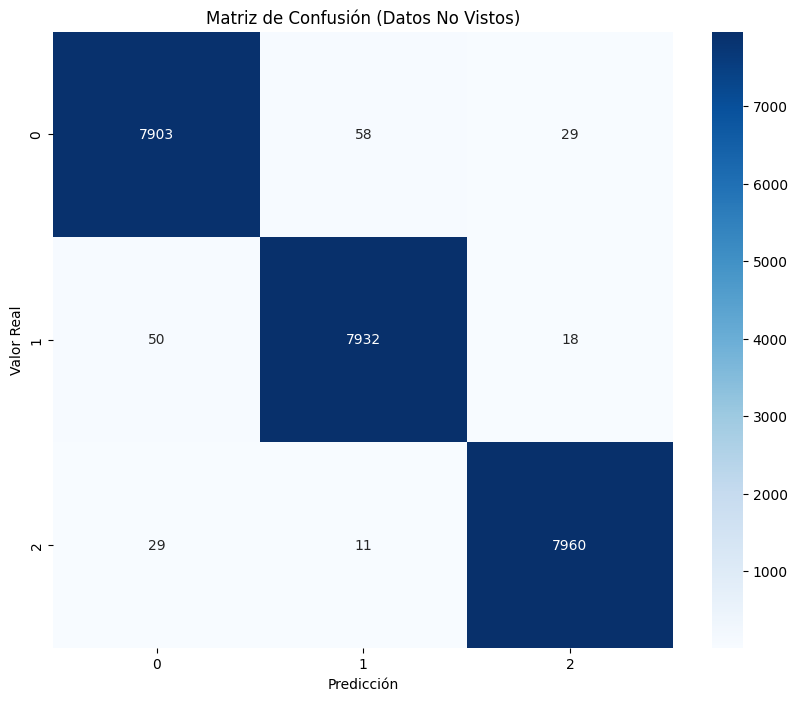

In [26]:
conf_matrix = confusion_matrix(y_nuevo, y_nuevos_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Datos No Vistos)')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

### Normalización

Ante datos extremadamente buenos vamos a probar a normalizar todas las variables.

In [27]:
X_3 = df[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity_normalized']]
y_3 = df['decade_label']

In [28]:
X_scal = X_3.copy()

scaler = StandardScaler()

X_scal = scaler.fit_transform(X_scal)

X_scal = pd.DataFrame(X_scal, columns=X_3.columns)


In [29]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_scal, y_3, test_size=0.2, random_state=42)

In [30]:
model_3 = XGBClassifier(random_state=42)
model_3.fit(X_train_std, y_train_std)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [31]:
y_pred_std = model_3.predict(X_test_std)

accuracy_std = accuracy_score(y_test_std, y_pred_std)
precision_std = precision_score(y_test_std, y_pred_std, average='macro')
recall_std = recall_score(y_test_std, y_pred_std, average='macro')
f1_std = f1_score(y_test_std, y_pred_std, average='macro')

print("Rendimiento con todas las variables estandarizadas (StandardScaler):")
print("Accuracy:", accuracy_std)
print("Precision:", precision_std)
print("Recall:", recall_std)
print("F1-Score:", f1_std)

Rendimiento con todas las variables estandarizadas (StandardScaler):
Accuracy: 0.996040016673614
Precision: 0.9960374402455168
Recall: 0.9960465716087765
F1-Score: 0.9960407813280413


In [32]:
feature_importances = model_3.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_3.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
1,acousticness,0.207492
12,popularity_normalized,0.194126
6,loudness,0.139134
0,duration_ms,0.080256
2,danceability,0.067535
4,instrumentalness,0.063178
3,energy,0.063055
9,valence,0.059247
7,speechiness,0.057625
8,tempo,0.034444


### SelectKBest

In [33]:
X_4 = df[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity_normalized']]
y_4 = df['decade_label']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.2, random_state=42)

In [35]:
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [36]:
selected_features = X_4.columns[selector.get_support()]
print(f"Características seleccionadas (top {k}):")
print(selected_features)

Características seleccionadas (top 10):
Index(['duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')


In [37]:
model_4 = XGBClassifier(random_state=42)
model_4.fit(X_train_selected, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [38]:
y_pred_4 = model_4.predict(X_test_selected)
accuracy_4 = accuracy_score(y_test, y_pred_4)
precision_4 = precision_score(y_test, y_pred_4, average='macro')
recall_4 = recall_score(y_test, y_pred_4, average='macro')
f1_4 = f1_score(y_test, y_pred_4, average='macro')

print("Accuracy:", accuracy_4)
print("Precisión (Precision):", precision_4)
print("Sensibilidad (Recall):", recall_4)
print("F1-Score:", f1_4)

Accuracy: 0.6941954981242184
Precisión (Precision): 0.6931357736412567
Sensibilidad (Recall): 0.6936306771966229
F1-Score: 0.6907018546791509


### Hiperparametrización

Se eligen además menos variables que apenas tienen importancia según el features importances. Nos quedamos con las 10 priemras.

In [39]:
X_5 = df[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
          'loudness', 'speechiness', 'valence', 'tempo', 'popularity_normalized']]
y_5 = df['decade_label']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, train_size=0.2, random_state=42)
model_5 = XGBClassifier(random_state=42)
model_5.fit(X_train, y_train)

print(X_5.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(95958, 10)
(19191, 10)
(76767, 10)
(19191,)
(76767,)


In [41]:
y_pred_5 = model_5.predict(X_test)
accuracy_5 = accuracy_score(y_test, y_pred_5)
precision_5 = precision_score(y_test, y_pred_5, average='macro')
recall_5 = recall_score(y_test, y_pred_5, average='macro')
f1_5 = f1_score(y_test, y_pred_5, average='macro')

print("Accuracy:", accuracy_5)
print("Precisión (Precision):", precision_5)
print("Sensibilidad (Recall):", recall_5)
print("F1-Score:", f1_5)

Accuracy: 0.991663084398244
Precisión (Precision): 0.9916625795994336
Sensibilidad (Recall): 0.9916632154719457
F1-Score: 0.9916628639644981


El resultado con menos variables apenas se modifica.

In [42]:
param_grid = {
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [1, 10, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [50, 100]}

model_6 = XGBClassifier(random_state=42)


grid_search = GridSearchCV(estimator=model_6, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 1}


In [43]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy en prueba:", accuracy_score(y_test, y_pred))

Accuracy en prueba: 0.8861099170216369


In [47]:
X_nuevo_6 = df_nuevo[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
          'loudness', 'speechiness', 'valence', 'tempo', 'popularity_normalized']]
y_nuevo_6 = df_nuevo['decade_label']

In [48]:
y_nuevos_pred_6 = best_model.predict(X_nuevo_6)

In [49]:
accuracy_6 = accuracy_score(y_nuevo_6, y_nuevos_pred_6)
precision_6 = precision_score(y_nuevo_6, y_nuevos_pred_6, average='macro')
recall_6 = recall_score(y_nuevo_6, y_nuevos_pred_6, average='macro')
f1_6 = f1_score(y_nuevo_6, y_nuevos_pred_6, average='macro')

print("Rendimiento en datos no vistos:")
print("Accuracy:", accuracy_6)
print("Precision:", precision_6)
print("Recall:", recall_6)
print("F1-Score:", f1_6)

Rendimiento en datos no vistos:
Accuracy: 0.8856606919549812
Precision: 0.8873316834882026
Recall: 0.8856699520233625
F1-Score: 0.8858937536760281


<mark>**Conclusiones:**</mark>

- **Balance entre simplicidad y precisión:** Aunque el accuracy no es tan alto como en los modelos anteriores, este modelo es más robusto debido a la regularización aplicada. Es menos probable que el modelo hiperparametrizado dependa excesivamente de características específicas o sesgadas.

- **Menor riesgo de sobreajuste:** La hiperparametrización y regularización aseguran que el modelo generalice mejor a datos nuevos. Este modelo puede ser más confiable cuando se introducen canciones con métricas atípicas o distribuciones diferentes.

- **Compromiso con la complejidad:** Es posible que el modelo esté sacrificando un poco de precisión para garantizar generalización.